In [1]:
import sys
molgen_path = "../"
if molgen_path not in sys.path:
    sys.path.insert(0, molgen_path)

In [2]:
from rdkit import Chem
from rdkit.Chem import Mol
from rdkit.Chem import inchi

def is_same_mol(mol1: Mol, mol2: Mol):
    inchi1 = inchi.MolToInchiKey(mol1)
    inchi2 = inchi.MolToInchiKey(mol2)
    return inchi1 == inchi2

def print_atoms_and_labels(mol: Mol):
    for a in mol.GetAtoms():
        text = a.GetSymbol() + ", MapNum: " + str(a.GetAtomMapNum())
        if a.HasProp('atomLabel'):
            text += ", label: " + a.GetProp("atomLabel")
        print(text)

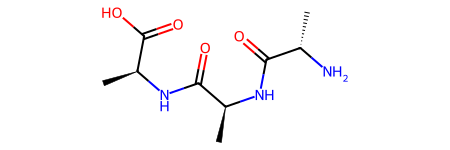

In [3]:
mol_h = Chem.MolFromHELM("PEPTIDE1{A.A.A}$$$$")
mol_h

In [15]:
%load_ext autoreload
%autoreload 2
from utils import MonomersLib, HELMConverter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
monomers_lib_path = molgen_path + "data/helm/library/chembl_35_monomer_library.xml"
lib = MonomersLib.load(monomers_lib_path)

[00:15:47] WARNING: not removing hydrogen atom with dummy atom neighbors
[00:15:47] WARNING: not removing hydrogen atom with dummy atom neighbors


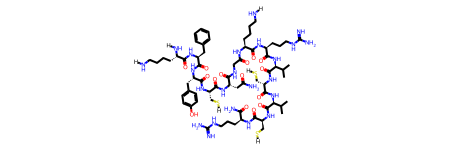

In [21]:
helm1 = "PEPTIDE1{G.R.G.D.S.P}$$$$"
helm2 = "PEPTIDE1{A.A.A}$$$$"
helm3 = "PEPTIDE1{A}$$$$"
helm = "PEPTIDE1{K.F.Y.C.N.G.K.R.V.C.V.C.R.[am]}$$$$"

helm_list = HELMConverter.split_helm(helm)
converter = HELMConverter(lib)
mol = converter.mol_from_single_polymer(helm_list)
mol = converter.close_residual_attachment_points(mol)
mol

In [22]:
mol_h = Chem.MolFromHELM(helm)
is_same_mol(mol, mol_h)

True